### Needed Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import joblib

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

### Data Reading and Overlook

In [2]:
df_loan_approval = pd.read_csv("loan_approval_dataset.csv")

In [3]:
df_loan_approval.rename(columns={column_name:column_name.strip() for column_name in df_loan_approval.columns},inplace=True)

In [4]:
df_loan_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


No null values. 13 columns 4269 rows.

In [5]:
df_loan_approval.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


<Axes: xlabel='education', ylabel='count'>

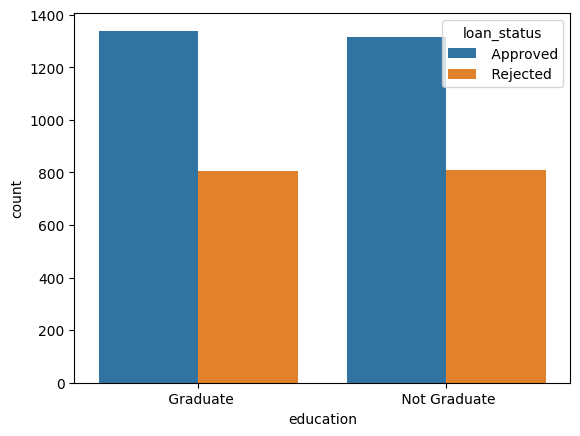

In [6]:
sns.countplot(data=df_loan_approval, x="education", hue="loan_status")

<Axes: xlabel='self_employed', ylabel='count'>

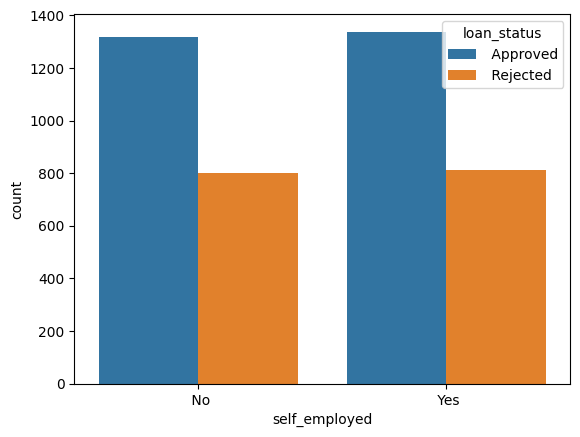

In [7]:
sns.countplot(data=df_loan_approval, x="self_employed", hue="loan_status")

<Axes: xlabel='loan_term', ylabel='count'>

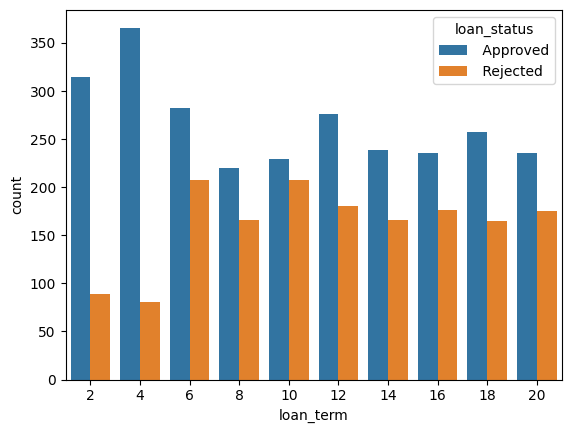

In [8]:
sns.countplot(data=df_loan_approval, x="loan_term", hue="loan_status")

### Converting Categorical Variables

In [9]:
list(enumerate(df_loan_approval['education'].unique())),list(enumerate(df_loan_approval['self_employed'].unique())),list(enumerate(df_loan_approval['loan_status'].unique()))

([(0, ' Graduate'), (1, ' Not Graduate')],
 [(0, ' No'), (1, ' Yes')],
 [(0, ' Approved'), (1, ' Rejected')])

In [10]:
label_encoder = preprocessing.LabelEncoder()
df_loan_approval['education_trans'] = label_encoder.fit_transform(df_loan_approval['education'])
df_loan_approval['self_employed_trans'] = label_encoder.fit_transform(df_loan_approval['self_employed'])
df_loan_approval['loan_status_trans'] = label_encoder.fit_transform(df_loan_approval['loan_status'])
df_loan_approval.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_trans,self_employed_trans,loan_status_trans
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,0,0,0
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,1,1,1
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0,0,1
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0,0,1
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,1,1,1


### Adding features to dataset

In [11]:
df_loan_approval['loan_income_ratio']= df_loan_approval['loan_amount']/df_loan_approval['income_annum']
df_loan_approval.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_trans,self_employed_trans,loan_status_trans,loan_income_ratio
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,0,0,0,3.114583
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,1,1,1,2.975610
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0,0,1,3.263736
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0,0,1,3.743902
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,1,1,1,2.469388


In [12]:
df_loan_approval['total_assets'] = df_loan_approval[['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']].T.sum()
df_loan_approval.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_trans,self_employed_trans,loan_status_trans,loan_income_ratio,total_assets
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,0,0,0,3.114583,50700000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,1,1,1,2.975610,17000000
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0,0,1,3.263736,57700000
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0,0,1,3.743902,52700000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,1,1,1,2.469388,55000000


### Correlation Matrix

In [13]:
df_loan_approval_numerical = df_loan_approval[['no_of_dependents','income_annum','loan_amount','loan_term','cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value','education_trans','self_employed_trans','loan_income_ratio','total_assets','loan_status_trans']]

In [14]:
df_loan_approval_numerical.corr()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_trans,self_employed_trans,loan_income_ratio,total_assets,loan_status_trans
no_of_dependents,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,-0.002697,0.000765,-0.029256,0.005289,0.018114
income_annum,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,-0.011625,0.002368,0.019714,0.931845,0.015189
loan_amount,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,-0.010631,0.001450,0.340791,0.867067,-0.016150
loan_term,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,0.008417,0.004107,-0.002876,0.010131,0.113036
cibil_score,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,0.004649,-0.004866,0.002980,-0.023433,-0.770518
residential_assets_value,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,-0.010930,0.006144,0.021176,0.790402,0.014367
commercial_assets_value,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,0.006763,-0.017998,0.029573,0.730576,-0.008246
luxury_assets_value,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,-0.012471,0.004413,0.018091,0.928110,0.015465
bank_asset_value,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000,-0.009424,-0.000215,0.017282,0.833897,0.006778
education_trans,-0.002697,-0.011625,-0.010631,0.008417,0.004649,-0.010930,0.006763,-0.012471,-0.009424,1.000000,0.023224,0.004923,-0.009513,0.004918


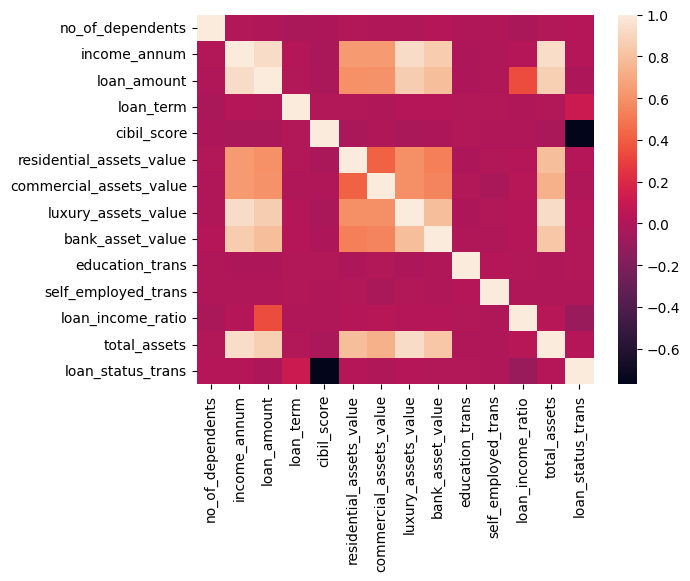

In [15]:
dataplot = sns.heatmap(df_loan_approval_numerical.corr())
plt.show()

### Training and Evaluation of the Model

In [16]:
feature_cols = ['no_of_dependents','income_annum','loan_amount','loan_term','cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value','education_trans','self_employed_trans','loan_income_ratio','total_assets']

X = df_loan_approval_numerical[feature_cols].values
y = df_loan_approval_numerical.loan_status_trans.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [17]:
clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.9960967993754879
Precision: 1.0
Recall: 0.989648033126294


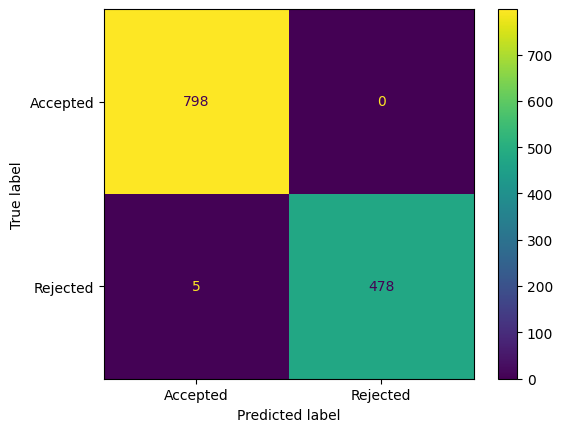

In [18]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Accepted', 'Rejected'])
cm_display.plot()
plt.show()

### Saving Model as Pickle

In [19]:
joblib.dump(clf, 'RandomForestClassifier.pkl')

['RandomForestClassifier.pkl']